['race_cards_2023-11.json']


100%|██████████| 1/1 [00:00<00:00,  4.96it/s]


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


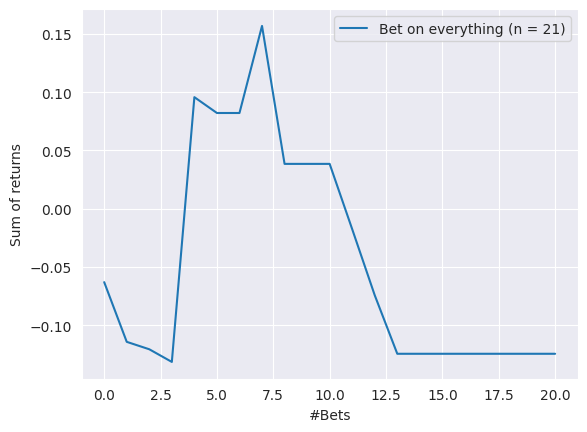

In [1]:
from Model.Betting.bet import Bet
from typing import List
import os
from Model.Betting.evaluate import PlaceBetEvaluator
from Persistence.RaceCardPersistence import RaceCardsPersistence
from tqdm import tqdm
from Model.Betting.race_results_container import RaceResultsContainer
from matplotlib import pyplot as plt
import pickle
import seaborn as sns
from numpy import cumsum

def plot_test_bets_return(test_bets: List[Bet], axis, label: str) -> None:
    payout_values = [bet.payout for bet in test_bets]
    date_values = list(range(len(payout_values)))
    cum_payout_values = cumsum(payout_values)
    label = f"{label} (n = {len(test_bets)})"
    print(date_values)
    sns.lineplot(ax=axis, x=date_values, y=cum_payout_values, label=label)

TEST_BETS_PATH = "../data/bets_log"
test_bets_base = []

for file_name in os.listdir(TEST_BETS_PATH):
    with open(f"{TEST_BETS_PATH}/{file_name}", "rb") as f:
        test_bets_base += pickle.load(f)
    
race_cards_loader = RaceCardsPersistence("race_cards")
race_results_container = RaceResultsContainer()

test_sample_file_names = race_cards_loader.race_card_file_names[-1:]

print(test_sample_file_names)

for race_card_file_name in tqdm(test_sample_file_names):
    race_cards = race_cards_loader.load_race_card_files_non_writable([race_card_file_name])
    race_results_container.add_results_from_race_cards(race_cards)
    
bet_evaluator = PlaceBetEvaluator(race_results_container.race_results)

bet_evaluator.insert_payouts_into_bets(test_bets_base)

fig, axes = plt.subplots(1, 1)

axes.set(xlabel="#Bets", ylabel="Sum of returns")
plot_test_bets_return(test_bets=test_bets_base, axis=axes, label="Bet on everything")

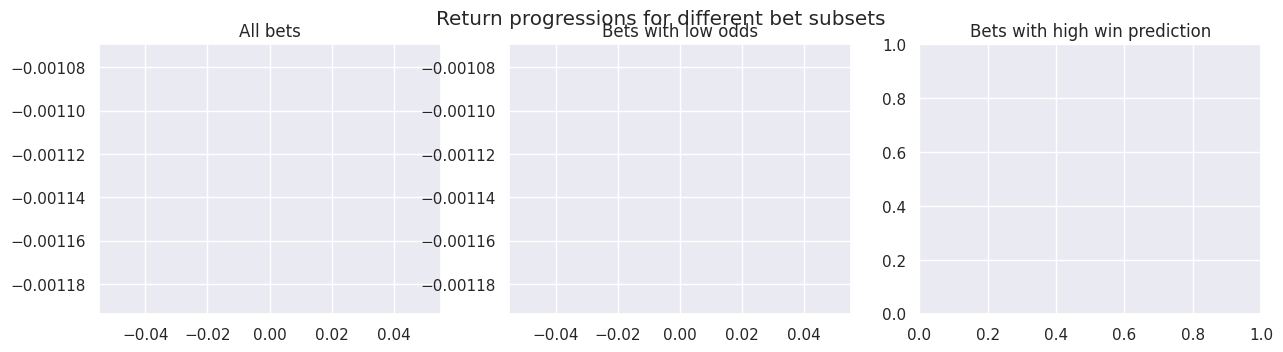

In [14]:
from Model.Betting.bet import Bet
from typing import List
import seaborn as sns
from matplotlib import pyplot as plt
from numpy import cumsum

sns.set(rc={'figure.figsize':(15,3.5)})

def plot_test_bets_return(axis, test_bets: List[Bet]) -> None:
    payout_values = [bet.payout for bet in test_bets]
    x = [i for i in range(len(payout_values))]
    cum_payout_values = cumsum(payout_values)
    sns.lineplot(ax=axis, x=x, y=cum_payout_values)

fig, axes = plt.subplots(1, 3)
fig.suptitle('Return progressions for different bet subsets')

axes[0].set_title("All bets")
plot_test_bets_return(axis=axes[0], test_bets=test_bets_base)

test_bets_low_odds = [bet for bet in test_bets_base if bet.bet_offer.odds < 20]
axes[1].set_title("Bets with low odds")
plot_test_bets_return(axis=axes[1], test_bets=test_bets_low_odds)

test_bets = [bet for bet in test_bets_base if bet.probability_estimate > 0.25]
axes[2].set_title("Bets with high win prediction")
plot_test_bets_return(axis=axes[2], test_bets=test_bets)